#### Model Evaluation

##### Regression Problems

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("D:\DS WorkFlow\ML-Concepts\BostonHousing.csv")

In [4]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [6]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
x = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [8]:
x

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [9]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

In [10]:
x.shape

(506, 13)

In [11]:
y.shape

(506,)

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [14]:
x

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)

In [17]:
xtrain.shape

(404, 13)

In [18]:
xtest.shape

(102, 13)

In [19]:
ytrain.shape

(404,)

In [20]:
ytest.shape

(102,)

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
model = LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression()

In [23]:
model.score(xtest,ytest)

0.7205739670504023

In [24]:
ypred = model.predict(xtest)

In [25]:
ypred

array([ 6.30573171, 13.05537311, 19.30329809, 20.23894864, 21.68870713,
       23.31371385, 12.94327568, 17.91007349, 18.55631342, 21.26414493,
       31.42983235, 15.90596271,  9.0207588 , 20.64649307, 18.39394114,
       18.29834094, 24.88232524, 30.54997656, 36.18476793, 21.15764052,
       18.69594722, 25.29979892, 31.98349054, 20.51776929, 31.77645942,
        6.49899216, 13.88511673, 20.84000615, 18.79541564, 28.80063586,
       22.59036542, 25.1565563 , 18.63126184, 26.15761336, 26.32258719,
       26.81463401, 24.60408029, 23.52412472, 21.5962859 , 27.79204056,
       12.70941011,  5.5732876 , 21.26946331, 16.32829375, 19.62833501,
       23.73261566, 19.36490588, 15.81393527, 32.97894121, 23.85010036,
       33.62322236, 38.47976689, 28.05050918, 24.07256297, 27.74020728,
       23.16662043, 25.21120524, 24.01553704, 35.41135541, 27.07970883,
       36.79375581, 16.53757829, 23.69004939, 10.93478249,  8.97131098,
       19.50594602, 36.434723  , 17.08500965, 29.76654668, 22.93

In [26]:
print(len(xtest))

102


In [27]:
print(len(ytest))

102


In [28]:
print(len(ypred))

102


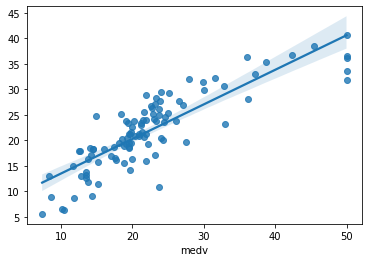

In [29]:
sns.regplot(x = ytest , y = ypred)
plt.show()

In [30]:
changes = list(ypred-ytest)

In [31]:
changes

[-4.194268289902489,
 4.75537310691648,
 -2.8967019077578833,
 1.6389486394378139,
 0.2887071290465286,
 2.113713847817582,
 0.14327568408389624,
 5.310073490635871,
 4.4563134177202475,
 1.6641449283775067,
 1.529832348769311,
 -5.994037291984245,
 -5.3792412031634615,
 -1.05350693404381,
 -1.206058857218821,
 2.1983409368208697,
 1.0823252425478707,
 -2.3500234436562693,
 -13.815232067014229,
 -0.8423594757944315,
 -0.8040527750220434,
 0.29979891916581636,
 4.083490538292217,
 -3.5822307099420527,
 -18.223540576226327,
 -3.70100783882282,
 0.38511672751308623,
 0.44000614678885697,
 -0.10458435650372166,
 6.8006358564538765,
 2.5903654164748886,
 6.656556303273888,
 1.1312618350415882,
 2.3576133645579773,
 3.5225871857297797,
 4.214634008628771,
 0.004080289050612862,
 -0.8758752755548862,
 1.796285901177086,
 1.1920405590639973,
 -0.8905898912550736,
 -1.8267124033444073,
 1.5694633143366268,
 -3.671706245847691,
 -7.871664989516702,
 4.532615662742,
 0.26490588426475625,
 0.61393

In [32]:
change_df = pd.DataFrame(data={'actual_value':ytest,
                               'predicted_value':ypred,
                               'error':changes})

In [33]:
change_df.head()

,actual_value,predicted_value,error
386,10.5,6.305732,-4.194268
403,8.3,13.055373,4.755373
327,22.2,19.303298,-2.896702
102,18.6,20.238949,1.638949
479,21.4,21.688707,0.288707


##### Mean Squared Error(MSE)

In [34]:
sq_error_lst = []
for i in changes:
    sq_error_lst.append(np.square(i))

In [35]:
sq_error_lst

[17.59188648768155,
 22.613573385984495,
 8.39088194240816,
 2.686152642715061,
 0.08335180636228894,
 4.4677862304558085,
 0.020527921649708437,
 28.19688047595382,
 19.85872927695351,
 2.769378342644577,
 2.340387015341027,
 35.928483057697825,
 28.936235921811484,
 1.1098768600783884,
 1.4545779670759682,
 4.832702874502459,
 1.1714279306563071,
 5.52261018573407,
 190.86063706545823,
 0.7095694864606694,
 0.6465008650206487,
 0.08987939193299169,
 16.67489497632206,
 12.832376859251942,
 332.09743113336737,
 13.697459023027958,
 0.1483148938103887,
 0.19360540921197714,
 0.010937887625297548,
 46.24864805208615,
 6.709992990869123,
 44.309741818655326,
 1.2797533394216614,
 5.558340776742386,
 12.408620481067649,
 17.76313982669022,
 1.6648758736551212e-05,
 0.7671574983283478,
 3.226643038767576,
 1.4209606944536073,
 0.7931503544057238,
 3.3368782045323004,
 2.4632150950485094,
 13.481426755796944,
 61.96310970718299,
 20.544604746134098,
 0.07017512751809243,
 0.3769165172966153

In [36]:
mse_numpy = np.mean(sq_error_lst)
print(f'the mse by numy method is {mse_numpy}')

the mse by numy method is 24.066256521296776


In [37]:
from sklearn.metrics import mean_squared_error

In [38]:
mse_sklearn = mean_squared_error(ytest,ypred)
print(f'the mse by numy method is {mse_sklearn}')

the mse by numy method is 24.066256521296776


#### Mean Absolute Error(MAE)

In [39]:
abs_error_lst = []
for i in changes:
    abs_error_lst.append(abs(i))

In [40]:
mae_numpy = np.mean(abs_error_lst)
print(f'the mean absolute error here is {mae_numpy}')

the mean absolute error here is 3.4404594905474064


In [41]:
from sklearn.metrics import mean_absolute_error

In [42]:
mae_sklearn = mean_absolute_error(ytest,ypred)

In [43]:
print(f'the mean absolute error with numpy method here is {mae_numpy}')
print(f'the mean absolute error with sklearn method here is {mae_sklearn}')

the mean absolute error with numpy method here is 3.4404594905474064
the mean absolute error with sklearn method here is 3.4404594905474064


In [44]:
##### Root Mean Squared Error (RMSE)
rmse_numpy = np.sqrt(mse_numpy)
rmse_sklearn = mean_squared_error(ytest,ypred,squared=False)


In [45]:
print(f'the rmse with numpy method is {rmse_numpy}')
print(f'the rmse with sklearn method is {rmse_sklearn}')

the rmse with numpy method is 4.905737102749879
the rmse with sklearn method is 4.905737102749879


In [46]:
#### R2 Score
from sklearn.metrics import r2_score
r2score = r2_score(ytest,ypred)

In [47]:
print(f'the r2 score here is {r2score}')

the r2 score here is 0.7205739670504023
